In [55]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

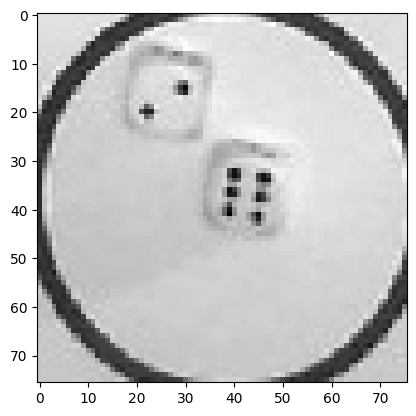

In [56]:
gray = cv2.imread('../circle_0.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap='gray')

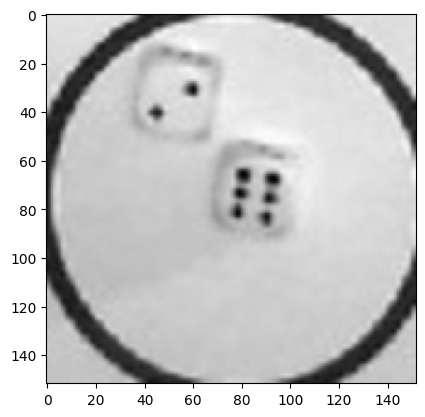

In [33]:
# upscale the image
gray = cv2.resize(gray, (0,0), fx=2, fy=2)
plt.imshow(gray, cmap='gray')

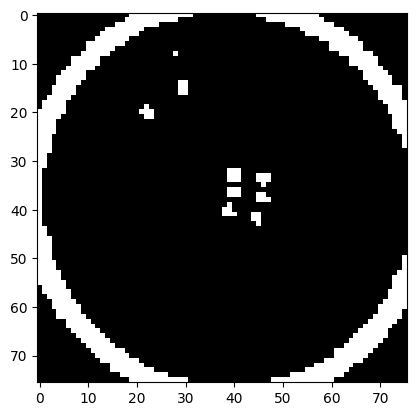

In [57]:
# threshold 
th, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU) 
# th, threshed = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshed, cmap='gray')

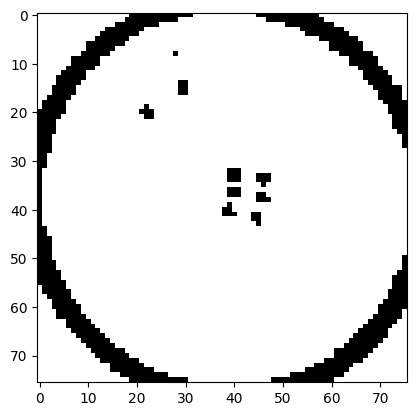

In [65]:
# invert the image
threshed = cv2.bitwise_not(threshed)
plt.imshow(threshed, cmap='gray')

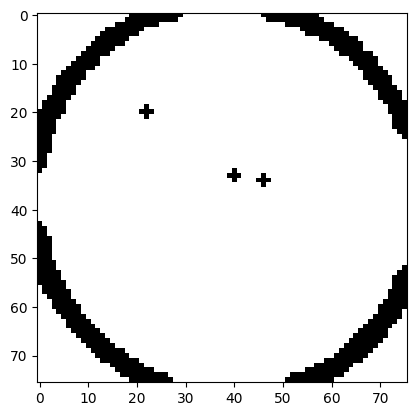

In [59]:
# erode the image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)
plt.imshow(morphed, cmap='gray')


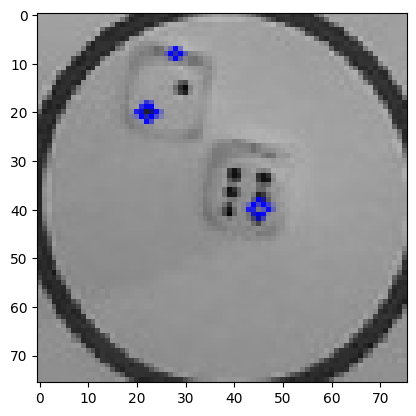

In [68]:
# Create a SimpleBlobDetector_Params object
params = cv2.SimpleBlobDetector_Params()

# Set the filterByArea attribute to True
params.filterByArea = True
params.minArea = .01
params.maxArea = 10

# Create a SimpleBlobDetector object with the updated parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(threshed)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(gray, keypoints, blank, (0,0,255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

plt.imshow(blobs)


In [31]:
# print the blobs area and position
for i in range(len(keypoints)):
    print("Blob " + str(i+1))
    print("Position: " + str(keypoints[i].pt))
    print("Area: " + str(keypoints[i].size))
    print()

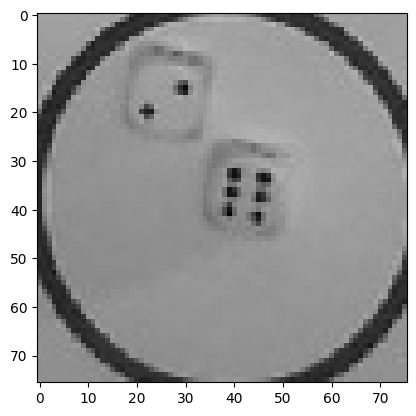

In [28]:
# draw the keypoints on the image
im_with_keypoints = cv2.drawKeypoints(gray, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)